In [1]:
from cgeniepy.foram import ForamModel as fm

modern = fm("../model/worjh2.RpCO2_Rp13CO2.Albani.0ka.historical")
future1p5 = fm("../model/worjh2.RpCO2_Rp13CO2.Albani.2100.1p5deg")
future2 = fm("../model/worjh2.RpCO2_Rp13CO2.Albani.2100.2deg")
future3= fm("../model/worjh2.RpCO2_Rp13CO2.Albani.2100.3deg")
future4 = fm("../model/worjh2.RpCO2_Rp13CO2.Albani.2100.4deg")

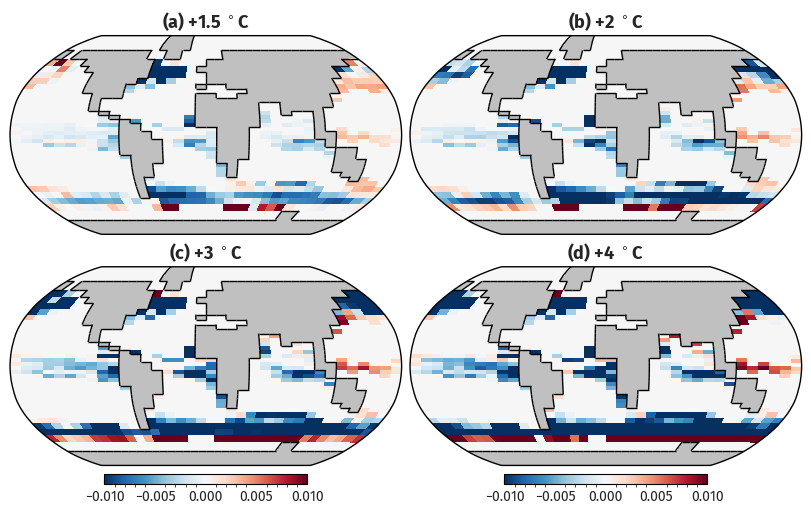

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
plt.rcParams["font.family"] = "Fira Sans"

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 5),
                        subplot_kw={'projection': ccrs.Robinson()},
                        constrained_layout=True)

modern_biomass = modern.select_foramtype(["bn", "bs","sn","ss"]).biomass(combine_vars=True).take(-1, axis=0)
titles = [r"(a) +1.5 $^\circ$C", r"(b) +2 $^\circ$C",
          r"(c) +3 $^\circ$C", r"(d) +4 $^\circ$C"]

for i, model in enumerate([future1p5, future2, future3, future4]):
    model_biomass = model.select_foramtype(["bn", "bs","sn","ss"]).biomass(combine_vars=True).take(-1, axis=0)
    diff = model_biomass - modern_biomass
    if i < 2:
        diff.plot_map(ax=axs.flat[i], cmap="RdBu_r", vmin=-0.01, vmax=0.01, colorbar=False)
    else:
        diff.plot_map(ax=axs.flat[i], cmap="RdBu_r", vmin=-0.01, vmax=0.01, colorbar=True)
    axs.flat[i].set_title(titles[i],  fontsize=13, fontweight="bold")

fig.savefig("../output/spatial_biomass_change.png", dpi=400)